<a href="https://colab.research.google.com/github/Samiksha2809/MLDLS-2022/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset=dataset.drop('Id',axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


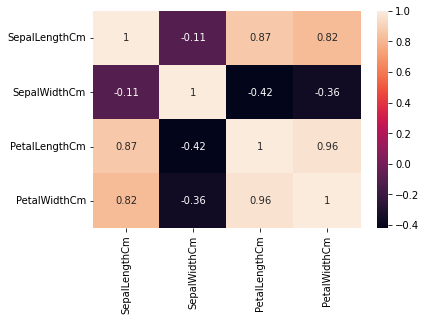

In [ ]:
correl=dataset.corr()
sns.heatmap(correl,annot=True)


Text(0.5, 1.0, 'Scatter Plot')

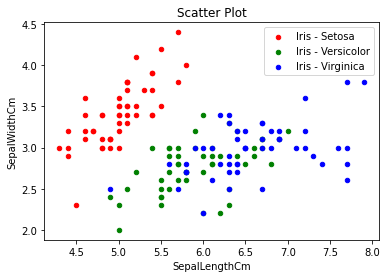

In [ ]:
ax = dataset[dataset.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
dataset[dataset.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
dataset[dataset.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

In [ ]:
#checking for Null values
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Label Encoding - for encoding categorical features into numerical ones
encoder = LabelEncoder()
dataset['Species'] = encoder.fit_transform(dataset['Species'])

In [ ]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
np.unique(dataset['Species'])

array([0, 1, 2])

In [ ]:
#converting dataframe to np array 
data = dataset.values 

X=data [:, 0:5]
Y= data [: , -1]

print(X.shape)
print(Y.shape)



(150, 5)
(150,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(112, 5)
(112,)
(38, 5)
(38,)


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train, y_train)

# training predictions
train_labels= kmeans.predict(x_train)

#testing predictions
test_labels = kmeans.predict(x_test)

In [ ]:
#KMeans model accuracy

#training accuracy
print(accuracy_score(y_train, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, y_test)*100)


33.92857142857143
39.473684210526315


In [ ]:
print(classification_report(train_y, train_labels))

              precision    recall  f1-score   support

         0.0       0.54      0.38      0.45        50
         1.0       0.51      0.40      0.45        50
         2.0       0.16      0.50      0.24        12

    accuracy                           0.40       112
   macro avg       0.40      0.43      0.38       112
weighted avg       0.49      0.40      0.43       112

